In [1]:
import os
import sys
sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
datadir = "/v/Data/cyto/ChannelOne/"
# datadir = "/home/cjw/disk2cjw/Data/cyto/mmFromTifs"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/v/Data/cyto/ChannelOne/Fish3_9.tif.mm', '/v/Data/cyto/ChannelOne/Fish6_15.tif.mm', '/v/Data/cyto/ChannelOne/Fish5_ice_21.tif.mm', '/v/Data/cyto/ChannelOne/Fish5_CCB_14.tif.mm', '/v/Data/cyto/ChannelOne/Fish5_13.tif.mm', '/v/Data/cyto/ChannelOne/Fish6_ice_22.tif.mm', '/v/Data/cyto/ChannelOne/Fish3_ice_19.tif.mm', '/v/Data/cyto/ChannelOne/Fish6_CCB_16.tif.mm']
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
(4,) [10000    64    64     1]
80000


dict_keys(['Fish3_9.tif.mm', 'Fish6_15.tif.mm', 'Fish5_ice_21.tif.mm', 'Fish5_CCB_14.tif.mm', 'Fish5_13.tif.mm', 'Fish6_ice_22.tif.mm', 'Fish3_ice_19.tif.mm', 'Fish6_CCB_16.tif.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

10000
10000
10000
10000
10000
10000
10000
10000


Encoder True
[<tf.Tensor 'Placeholder:0' shape=(?, 64, 64, 1) dtype=float32>, <tf.Tensor 'dropout/mul:0' shape=(?, 32, 32, 64) dtype=float32>, <tf.Tensor 'dropout_1/mul:0' shape=(?, 16, 16, 128) dtype=float32>, <tf.Tensor 'dropout_2/mul:0' shape=(?, 8, 8, 256) dtype=float32>] Tensor("latent_space/BiasAdd:0", shape=(?, 128), dtype=float32)
isize:  8 64
dh0 (?, 64, 64, 1)
[<tf.Tensor 'dropout_3/mul:0' shape=(?, 16384) dtype=float32>, <tf.Tensor 'Reshape:0' shape=(?, 8, 8, 256) dtype=float32>, <tf.Tensor 'dropout_4/mul:0' shape=(?, 16, 16, 128) dtype=float32>, <tf.Tensor 'dropout_5/mul:0' shape=(?, 32, 32, 64) dtype=float32>] Tensor("Minimum:0", shape=(?, 64, 64, 1), dtype=float32)
Tensor("Mean_1:0", shape=(), dtype=float32) Tensor("Mean_2:0", shape=(), dtype=float32) Tensor("add_5:0", shape=(), dtype=float32)
80000 625 128
Epoch:  0 Iteration:  0 Loss:  1037.6036 4.9204845 0.3394987


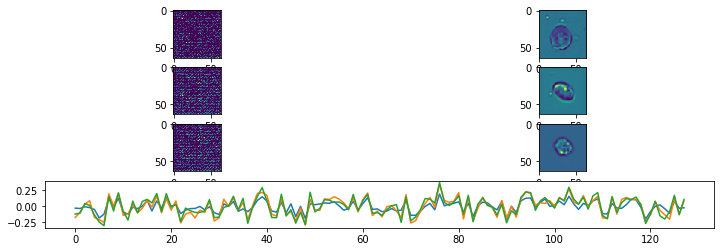

Epoch:  0 Iteration:  500 Loss:  16.104572 0.69658136 0.0077728927


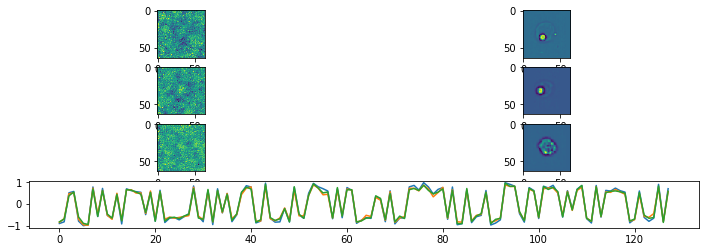

Epoch:  1 Iteration:  0 Loss:  13.610807 0.695444 0.0044955313


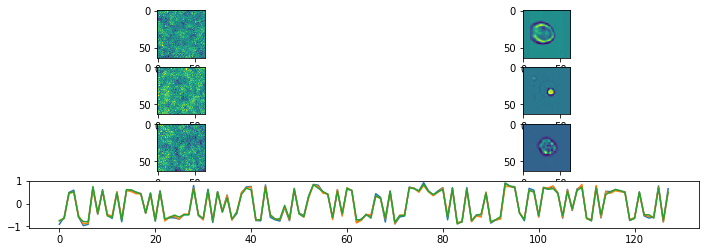

Epoch:  1 Iteration:  500 Loss:  12.712469 0.6949041 0.0073563457


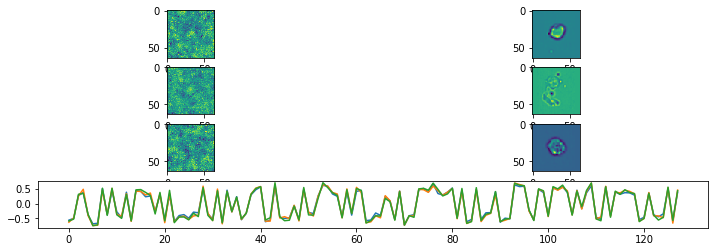

Epoch:  2 Iteration:  0 Loss:  11.028365 0.6941725 0.0043605864


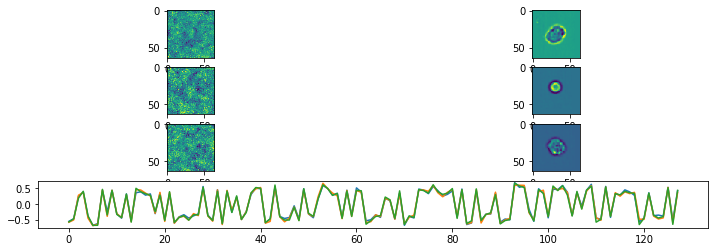

Epoch:  2 Iteration:  500 Loss:  10.016794 0.6935803 0.0015437901


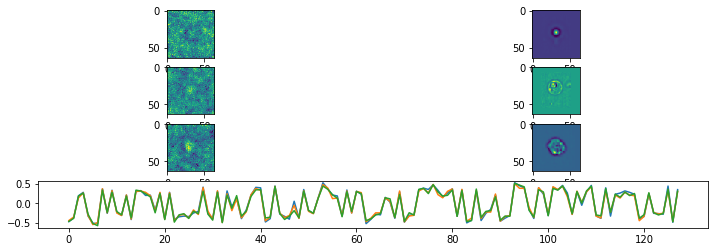

Epoch:  3 Iteration:  0 Loss:  10.971915 0.69414365 0.0074154437


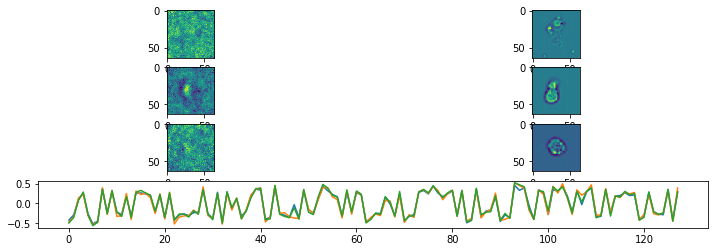

Epoch:  3 Iteration:  500 Loss:  7.451601 0.6923157 0.0017129183


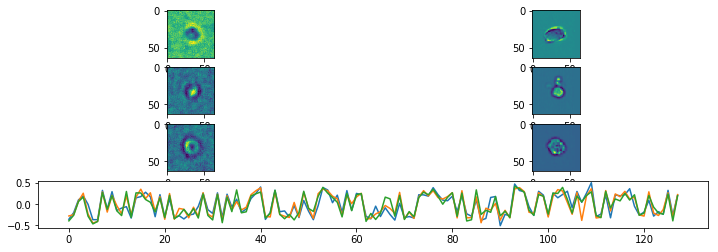

Epoch:  4 Iteration:  0 Loss:  7.1581507 0.692266 0.0016726553


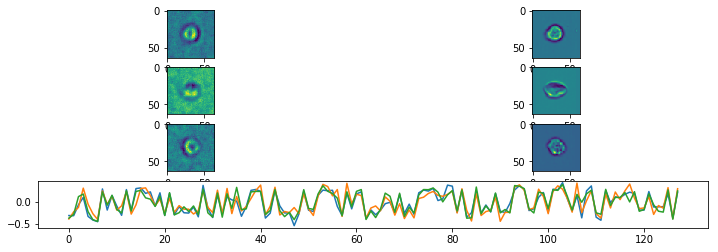

Epoch:  4 Iteration:  500 Loss:  5.8497868 0.69150865 0.0011892915


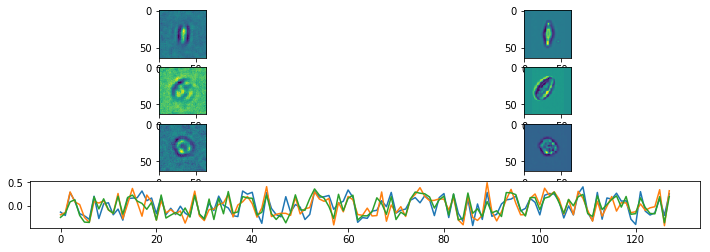

Epoch:  5 Iteration:  0 Loss:  5.8076444 0.69158864 0.0013098419


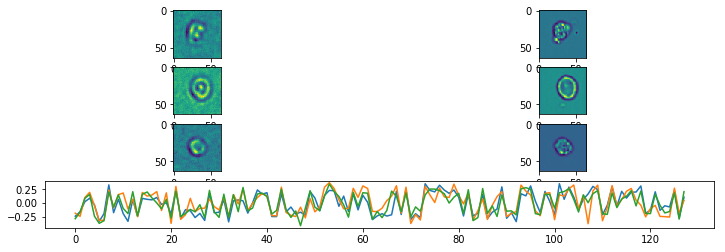

Epoch:  5 Iteration:  500 Loss:  5.03389 0.6910825 0.0028596818


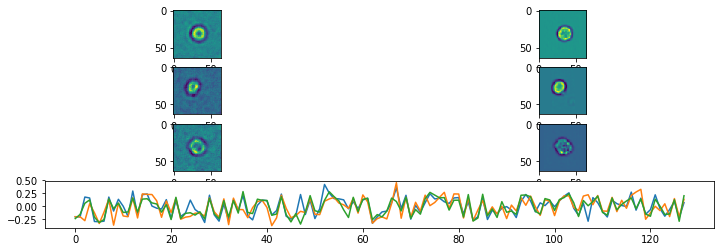

Epoch:  6 Iteration:  0 Loss:  4.9680862 0.6911768 0.0007301271


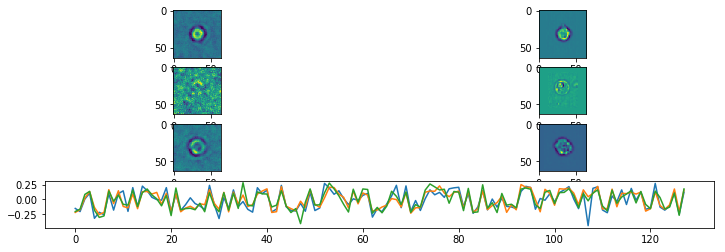

Epoch:  6 Iteration:  500 Loss:  4.1456394 0.69064 0.00091022253


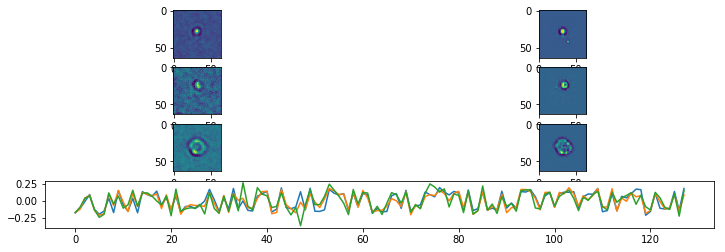

Epoch:  7 Iteration:  0 Loss:  4.3587723 0.6908677 0.0007840693


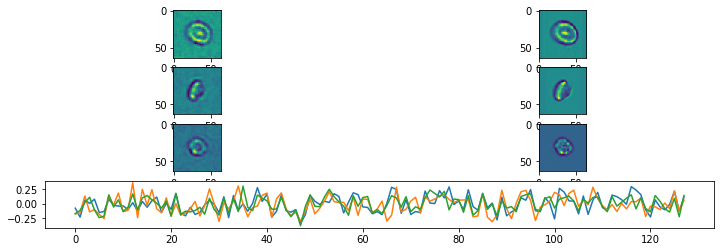

Epoch:  7 Iteration:  500 Loss:  3.727082 0.690431 0.0008085072


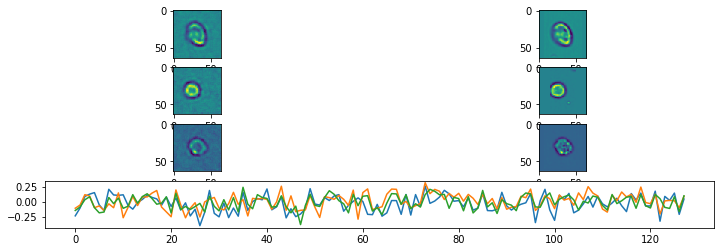

Epoch:  8 Iteration:  0 Loss:  3.9542587 0.6906594 0.0013134181


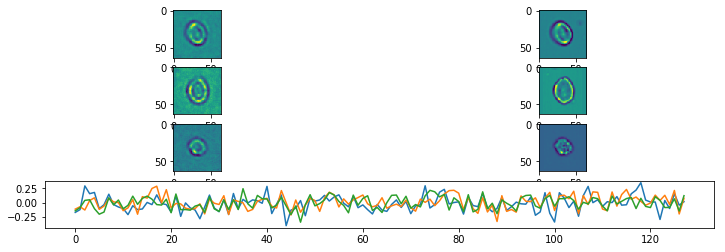

Epoch:  8 Iteration:  500 Loss:  3.4380822 0.69028395 0.00025120378


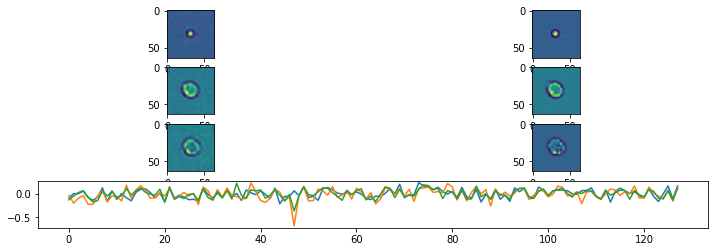

Epoch:  9 Iteration:  0 Loss:  3.656629 0.69053173 0.0004479289


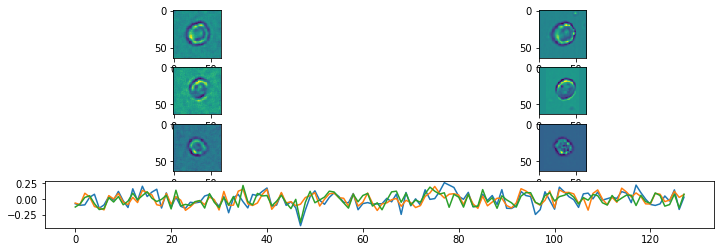

Epoch:  9 Iteration:  500 Loss:  3.2040234 0.6901687 8.511543e-05


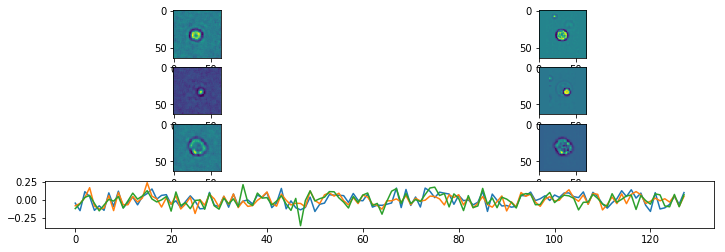

Epoch:  10 Iteration:  0 Loss:  3.415505 0.69040674 0.00041651726


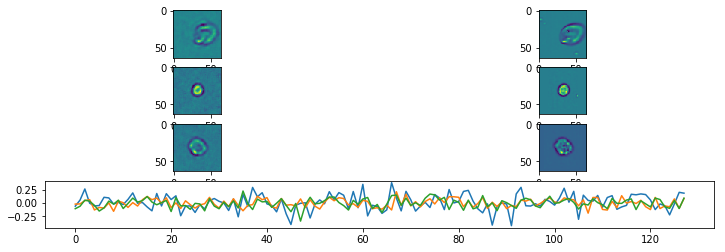

Epoch:  10 Iteration:  500 Loss:  3.0220912 0.6900995 0.00016665459


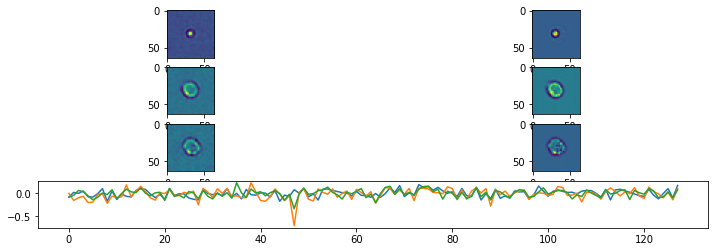

Epoch:  11 Iteration:  0 Loss:  3.2008655 0.6902833 0.00060275197


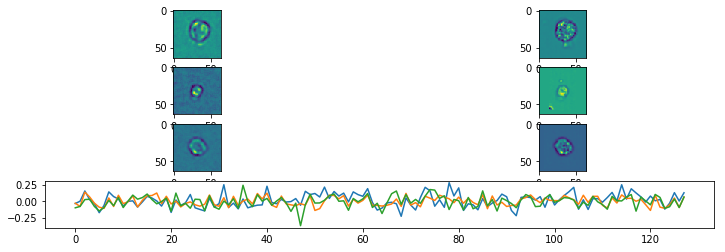

Epoch:  11 Iteration:  500 Loss:  2.8437686 0.6899829 0.0002232492


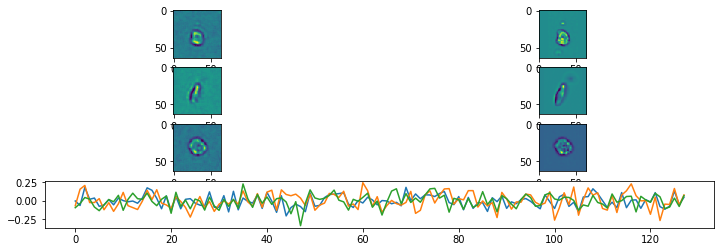

Epoch:  12 Iteration:  0 Loss:  3.0391564 0.6901986 0.00073218346


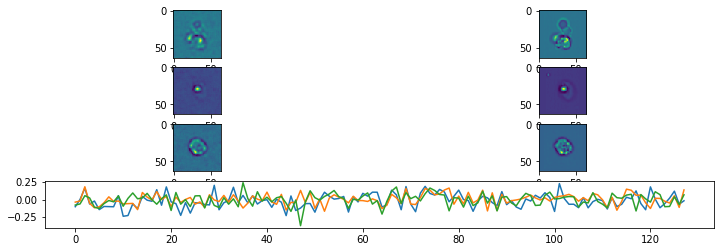

Epoch:  12 Iteration:  500 Loss:  2.756555 0.6899438 0.00071179867


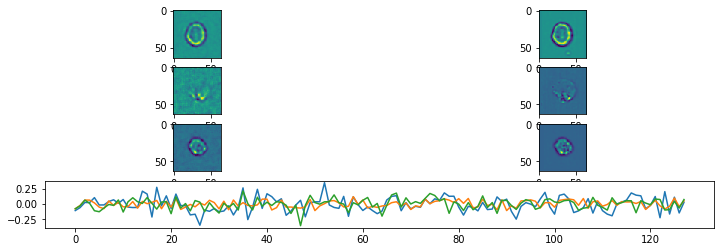

Epoch:  13 Iteration:  0 Loss:  2.8905544 0.69012153 0.00032779574


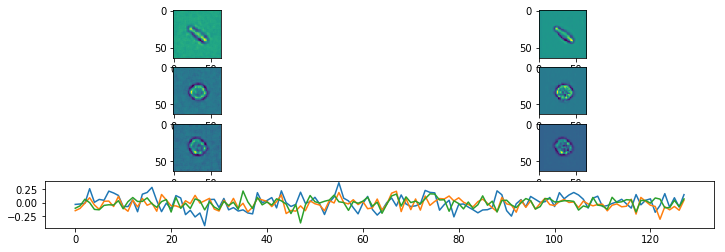

Epoch:  13 Iteration:  500 Loss:  2.6021059 0.6898432 0.0003284216


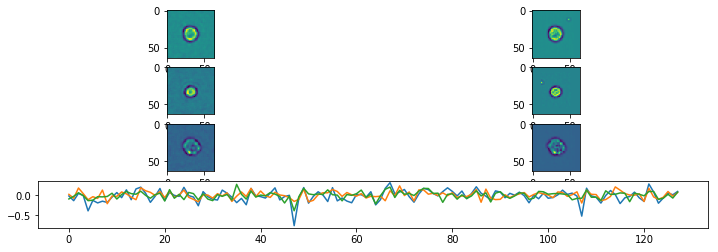

Epoch:  14 Iteration:  0 Loss:  2.7771754 0.6900683 0.0008780658


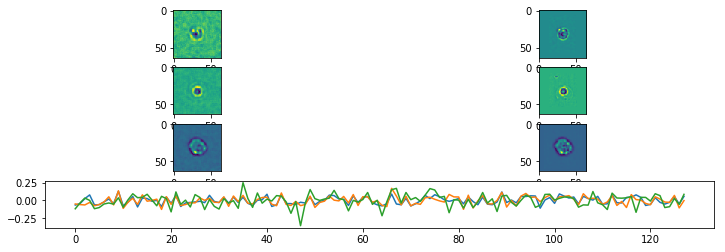

Epoch:  14 Iteration:  500 Loss:  2.4952626 0.6897778 0.0001565814


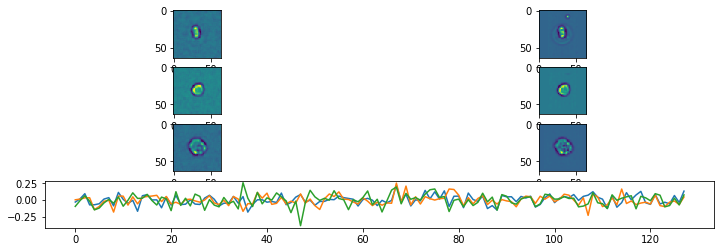

Epoch:  15 Iteration:  0 Loss:  2.6753745 0.69000846 6.580353e-05


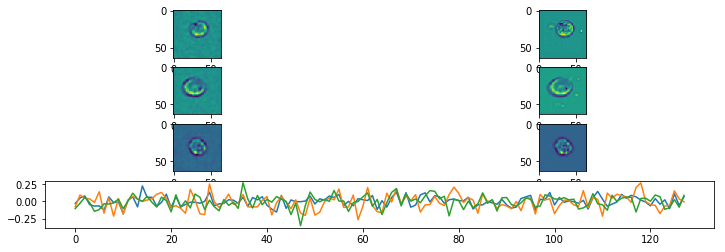

Epoch:  15 Iteration:  500 Loss:  2.4580426 0.68978363 0.0004735291


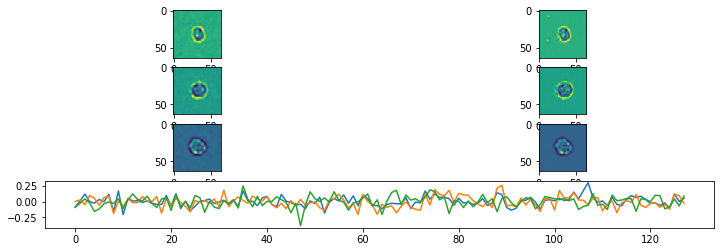

Epoch:  16 Iteration:  0 Loss:  2.59385 0.6899611 0.0004093051


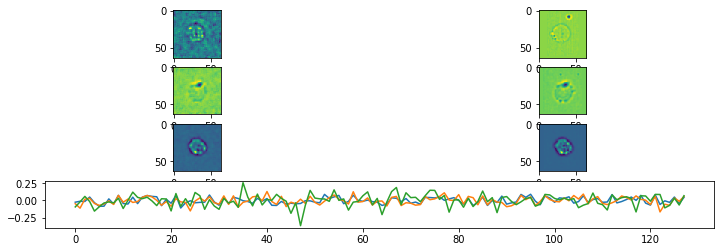

Epoch:  16 Iteration:  500 Loss:  2.3775492 0.6897058 0.00017118454


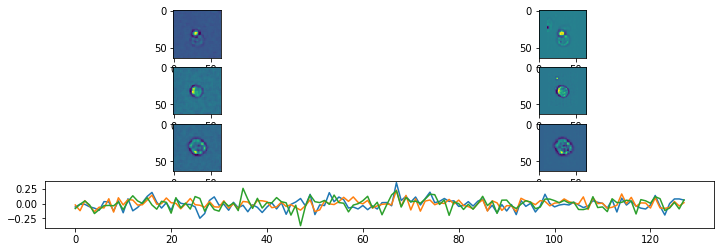

Epoch:  17 Iteration:  0 Loss:  2.5262666 0.689934 0.0007069707


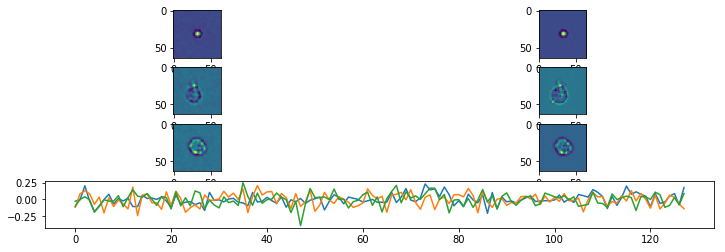

Epoch:  17 Iteration:  500 Loss:  2.3287086 0.6896918 0.00067546964


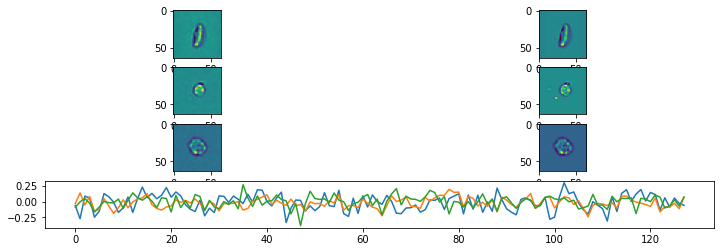

Epoch:  18 Iteration:  0 Loss:  2.4646387 0.6898849 0.00036114454


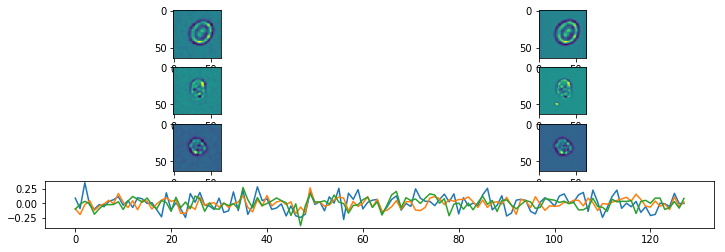

Epoch:  18 Iteration:  500 Loss:  2.256165 0.6896486 4.246831e-05


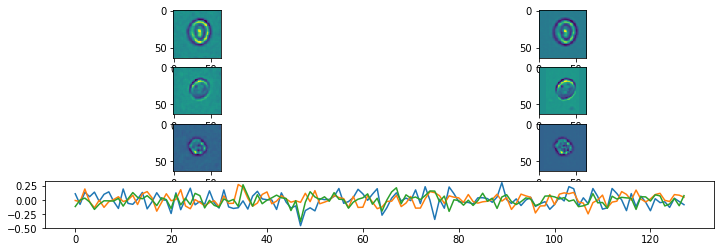

Epoch:  19 Iteration:  0 Loss:  2.4196563 0.68986595 0.0005721748


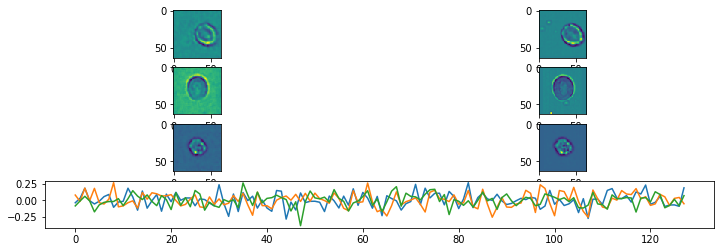

Epoch:  19 Iteration:  500 Loss:  2.2226574 0.6896255 0.00028666854


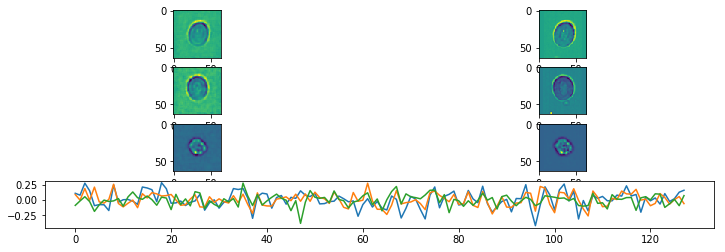

Epoch:  20 Iteration:  0 Loss:  2.3802147 0.6898633 0.00041148067


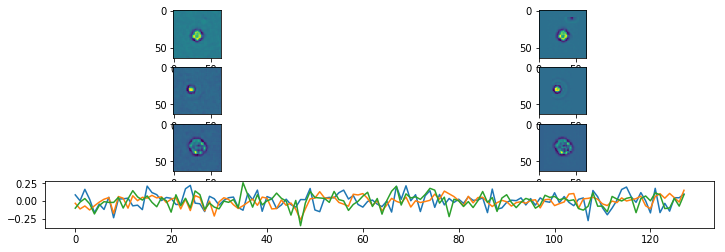

Epoch:  20 Iteration:  500 Loss:  2.194142 0.68961024 9.083748e-05


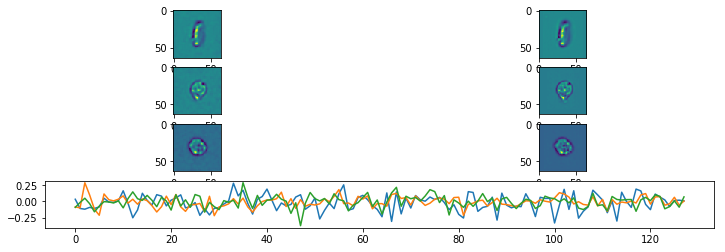

Epoch:  21 Iteration:  0 Loss:  2.3431027 0.68981856 0.00037822127


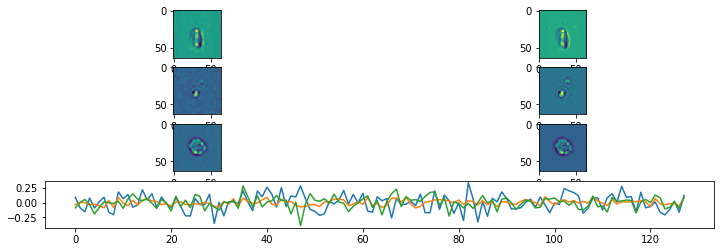

Epoch:  21 Iteration:  500 Loss:  2.157641 0.68959546 0.00015974045


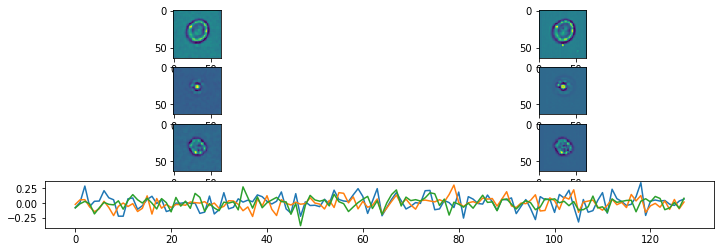

Epoch:  22 Iteration:  0 Loss:  2.2984493 0.6897955 0.00028404593


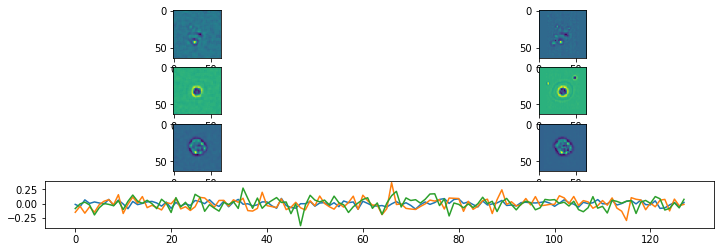

Epoch:  22 Iteration:  500 Loss:  2.160821 0.68959713 0.00048968196


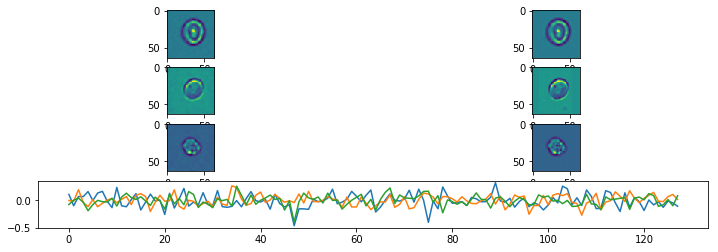

Epoch:  23 Iteration:  0 Loss:  2.2649388 0.68979526 0.0003837943


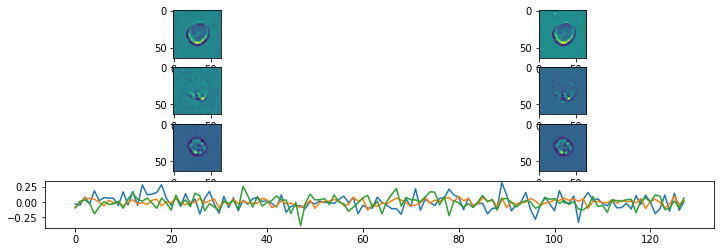

Epoch:  23 Iteration:  500 Loss:  2.122582 0.68956566 0.00082337856


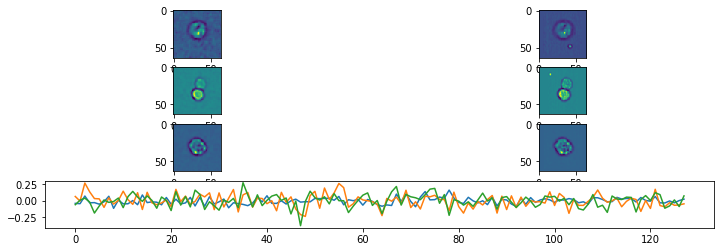

Epoch:  24 Iteration:  0 Loss:  2.2533448 0.6897675 0.0003902018


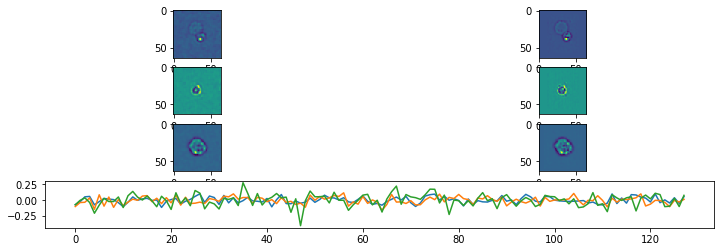

Epoch:  24 Iteration:  500 Loss:  2.0921254 0.6895544 0.0006645322


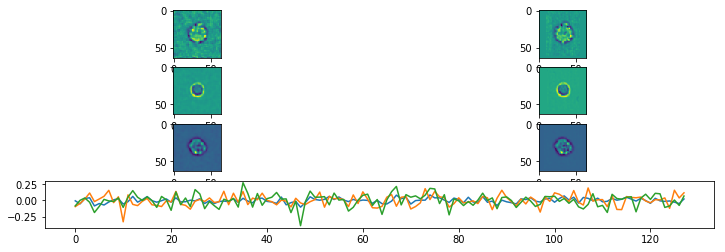

Epoch:  25 Iteration:  0 Loss:  5.367462 0.6913736 0.0013287365


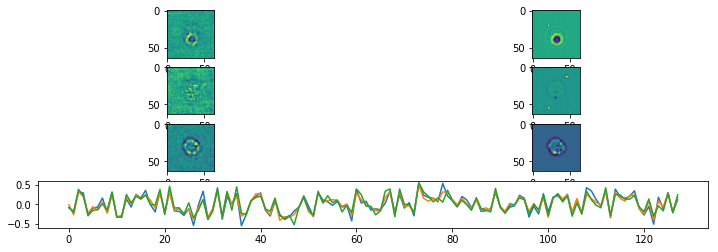

Epoch:  25 Iteration:  500 Loss:  2.3792844 0.6897188 0.00010716915


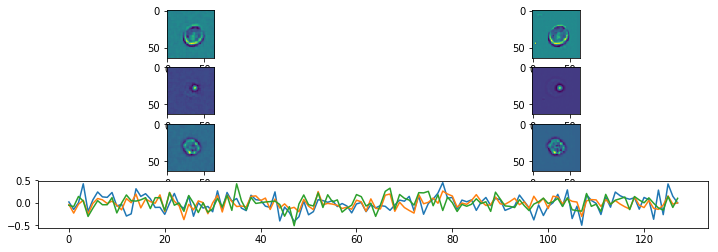

Epoch:  26 Iteration:  0 Loss:  2.4971871 0.6899007 0.0004376173


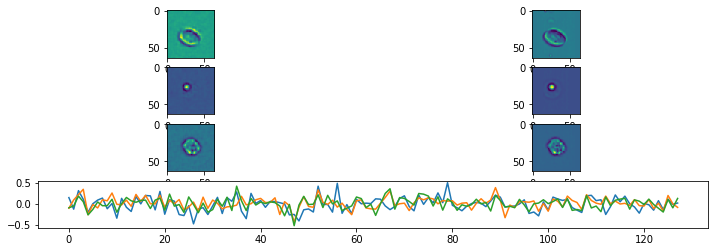

Epoch:  26 Iteration:  500 Loss:  2.2112806 0.68962014 1.1920929e-06


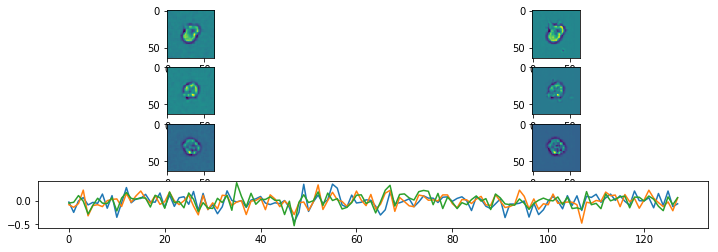

Epoch:  27 Iteration:  0 Loss:  2.3468866 0.68982077 0.00024172664


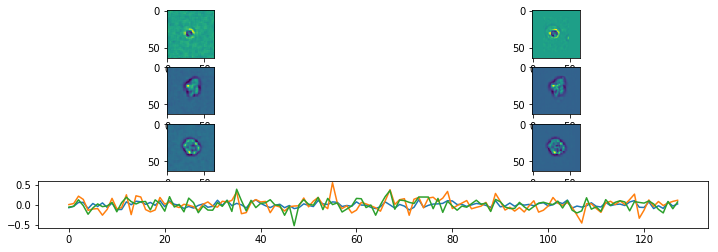

Epoch:  27 Iteration:  500 Loss:  2.1433158 0.6895783 9.453297e-05


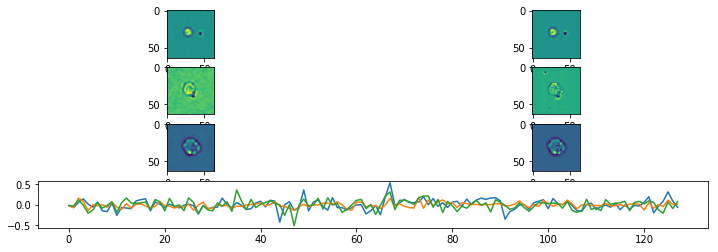

Epoch:  28 Iteration:  0 Loss:  2.2917614 0.68979466 0.00012585521


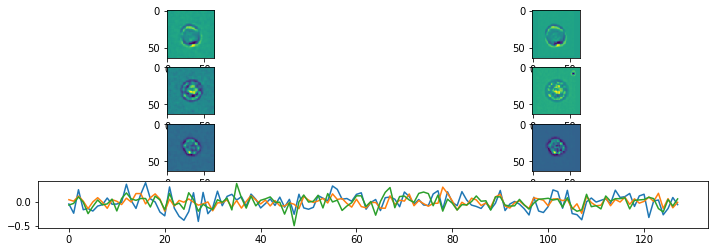

Epoch:  28 Iteration:  500 Loss:  2.126588 0.6895706 0.00020214915


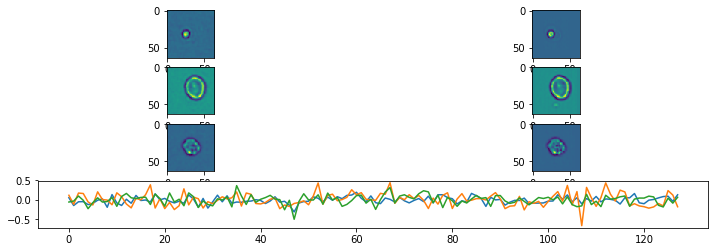

Epoch:  29 Iteration:  0 Loss:  2.246386 0.6897757 0.00010943413


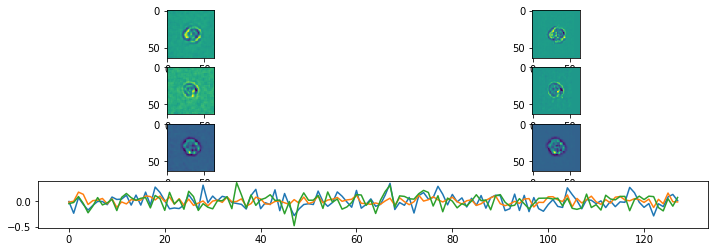

Epoch:  29 Iteration:  500 Loss:  2.0934596 0.68956053 0.0001039803


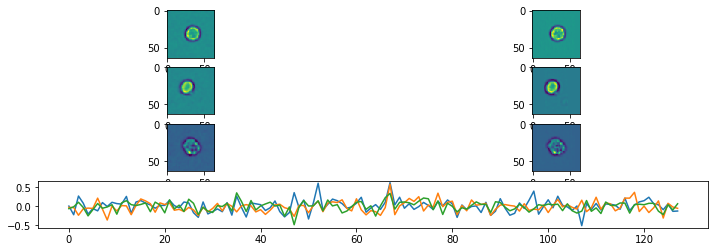

Epoch:  30 Iteration:  0 Loss:  2.2326033 0.6897521 8.252263e-05


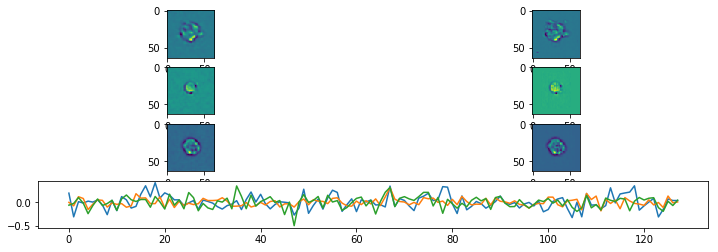

Epoch:  30 Iteration:  500 Loss:  2.0740037 0.68953925 0.00015288591


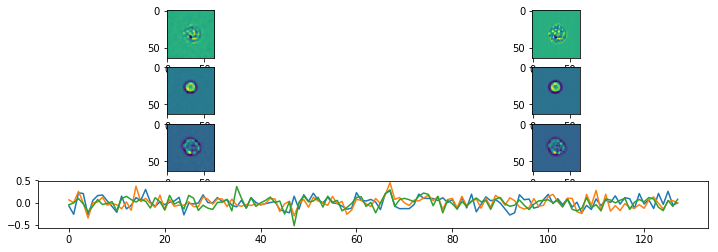

Epoch:  31 Iteration:  0 Loss:  2.2077622 0.68975127 4.0978193e-05


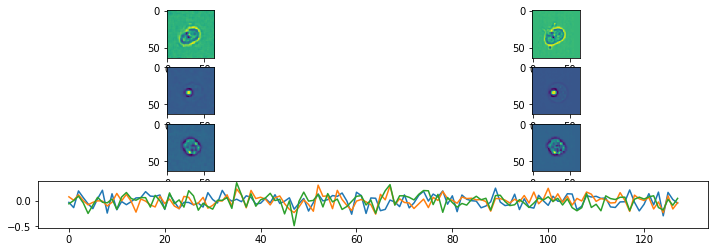

Epoch:  31 Iteration:  500 Loss:  2.066855 0.6895353 0.00017866492


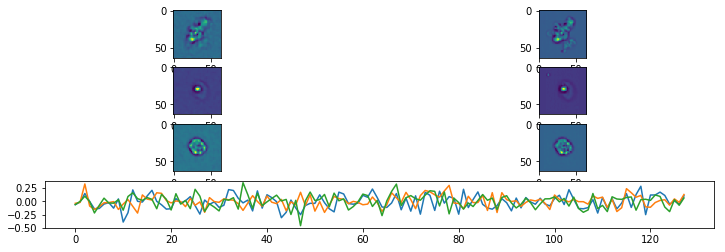

Epoch:  32 Iteration:  0 Loss:  2.1882 0.6897434 4.2825937e-05


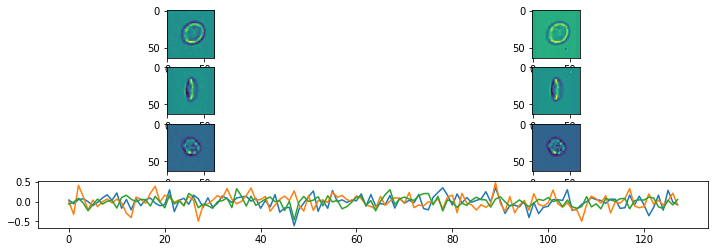

Epoch:  32 Iteration:  500 Loss:  2.0517578 0.6895421 0.00019797683


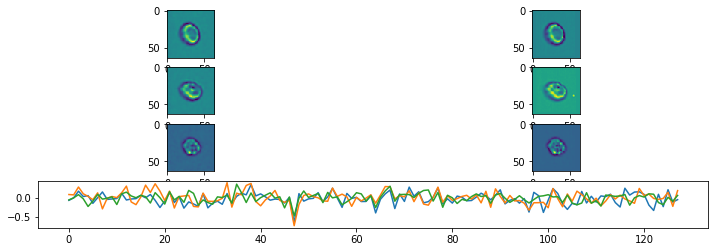

Epoch:  33 Iteration:  0 Loss:  2.168358 0.6897228 8.806586e-05


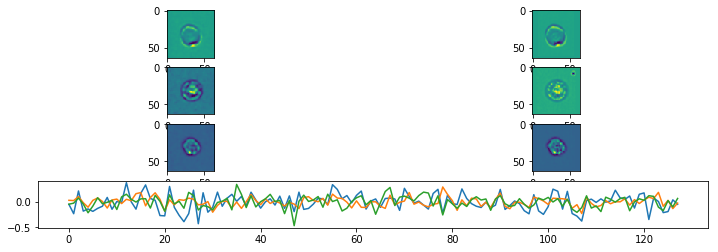

Epoch:  33 Iteration:  500 Loss:  2.0348132 0.68951863 0.0001705885


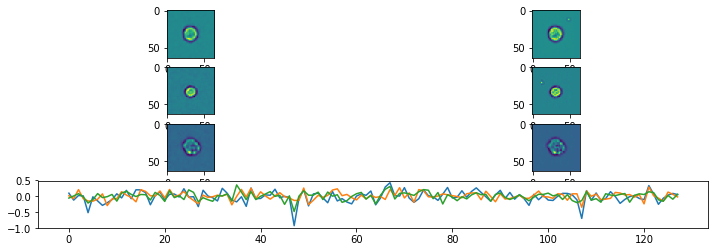

Epoch:  34 Iteration:  0 Loss:  2.161149 0.689715 0.0001128912


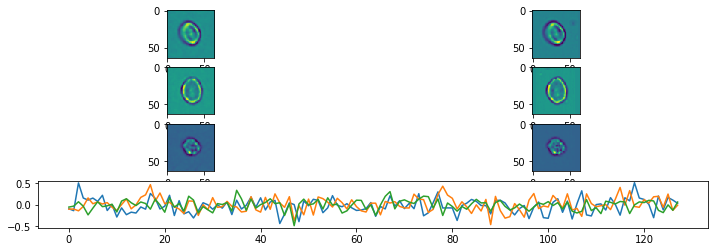

Epoch:  34 Iteration:  500 Loss:  2.0187438 0.68951124 0.00013136864


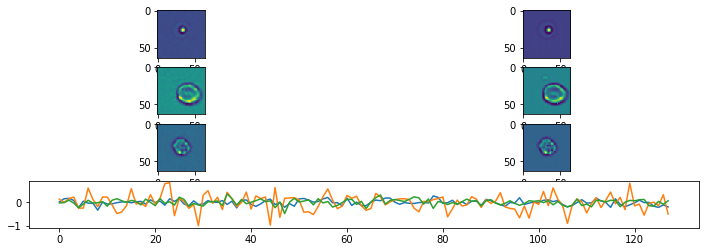

Epoch:  35 Iteration:  0 Loss:  2.1436281 0.6897117 0.00014737248


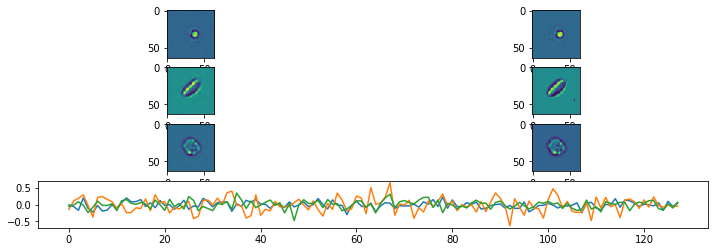

Epoch:  35 Iteration:  500 Loss:  2.0150795 0.68951726 9.864569e-05


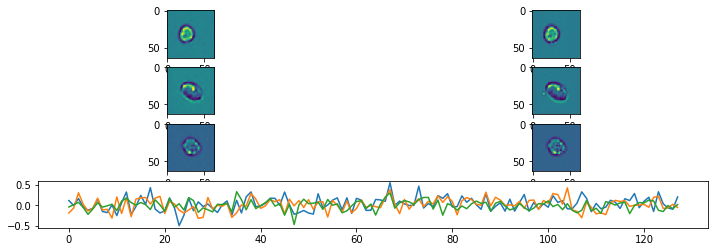

Epoch:  36 Iteration:  0 Loss:  2.1474266 0.6897056 0.0006970167


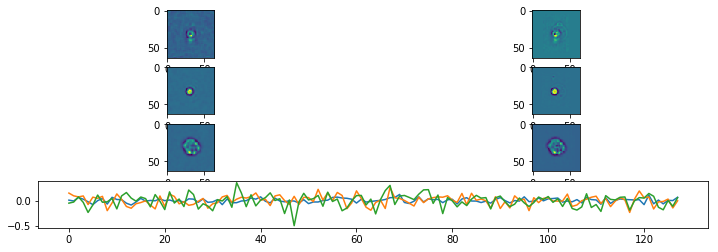

Epoch:  36 Iteration:  500 Loss:  2.002262 0.6894977 0.00017794967


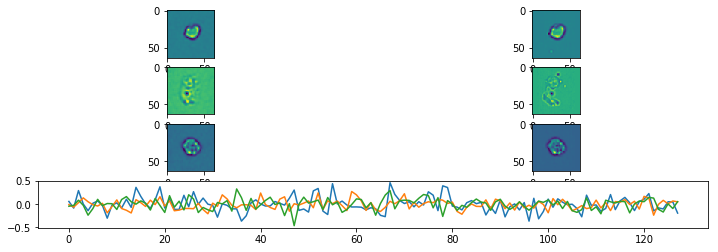

Epoch:  37 Iteration:  0 Loss:  2.1195652 0.6897053 0.00041988492


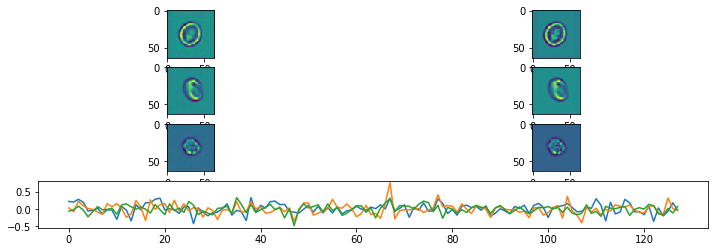

Epoch:  37 Iteration:  500 Loss:  1.9885368 0.6894952 0.00014573336


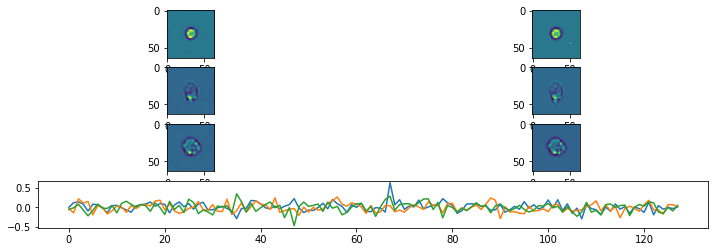

Epoch:  38 Iteration:  0 Loss:  2.1093965 0.68969077 0.0004787743


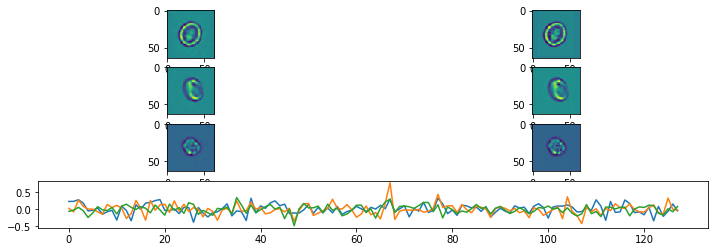

Epoch:  38 Iteration:  500 Loss:  1.9699697 0.6894822 0.00012075901


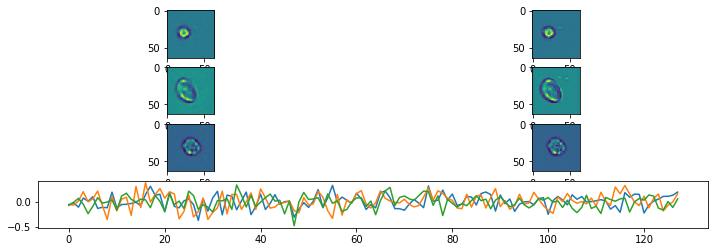

Epoch:  39 Iteration:  0 Loss:  2.1007996 0.68967474 0.0005891621


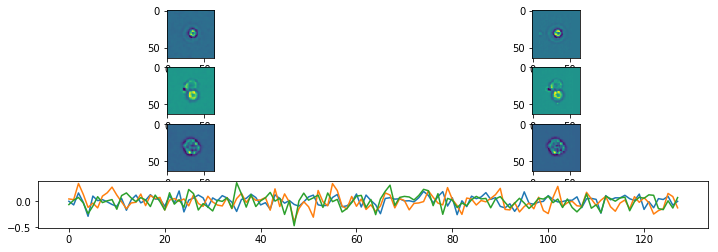

Epoch:  39 Iteration:  500 Loss:  1.9748968 0.6894807 0.00049608946


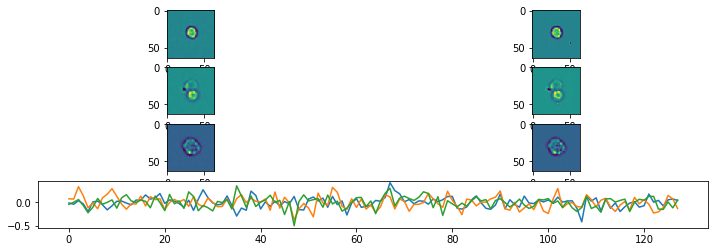

Epoch:  40 Iteration:  0 Loss:  2.0858076 0.68966717 9.179115e-05


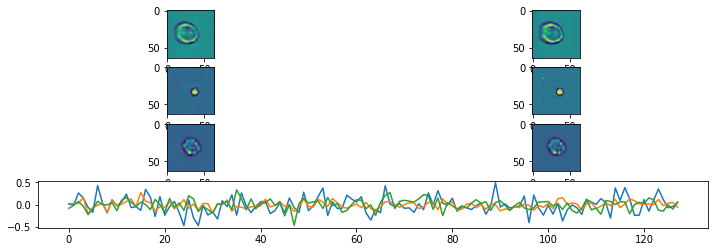

Epoch:  40 Iteration:  500 Loss:  1.9554214 0.68947566 0.00036370754


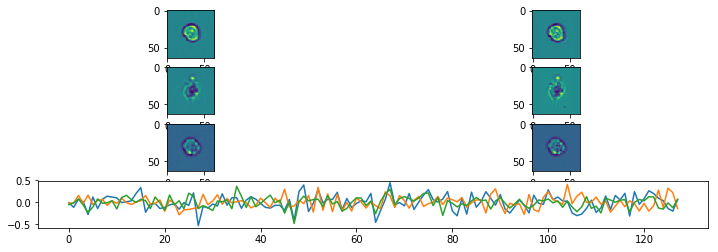

Epoch:  41 Iteration:  0 Loss:  2.0669394 0.68966275 0.00033172965


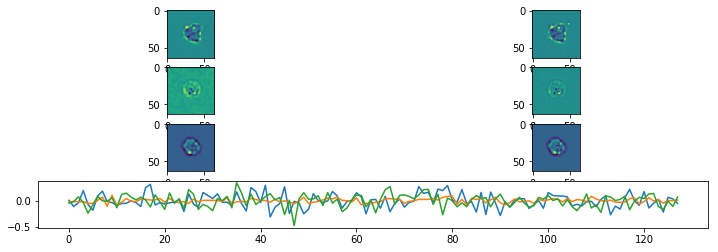

Epoch:  41 Iteration:  500 Loss:  1.9413166 0.689467 0.0003491938


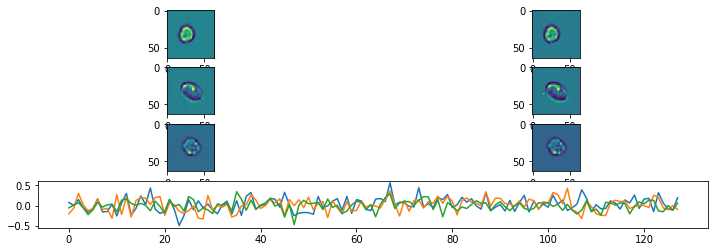

Epoch:  42 Iteration:  0 Loss:  4.537914 0.6909448 0.0010339916


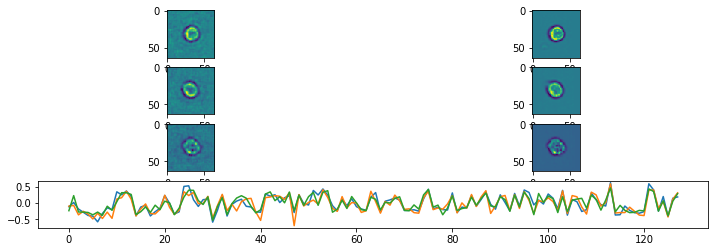

Epoch:  42 Iteration:  500 Loss:  2.2531512 0.6896419 0.00042548776


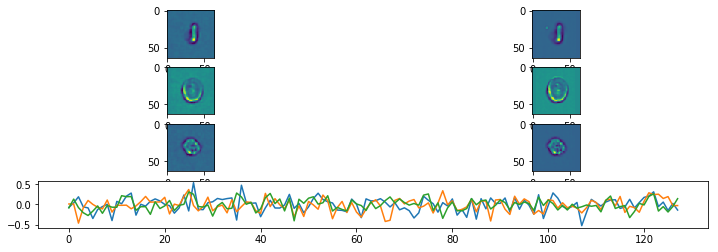

Epoch:  43 Iteration:  0 Loss:  2.3666663 0.68982595 0.00025725365


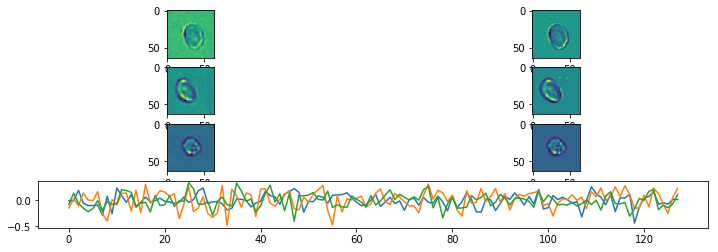

Epoch:  43 Iteration:  500 Loss:  2.0640635 0.6895379 0.00018796325


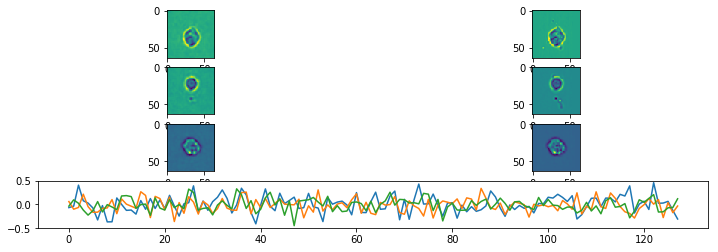

Epoch:  44 Iteration:  0 Loss:  2.2118568 0.68974304 0.00029310584


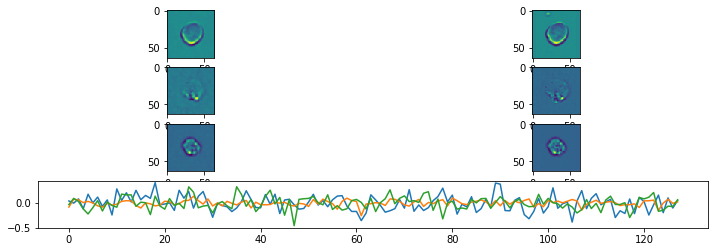

Epoch:  44 Iteration:  500 Loss:  2.012992 0.68951225 0.00015771389


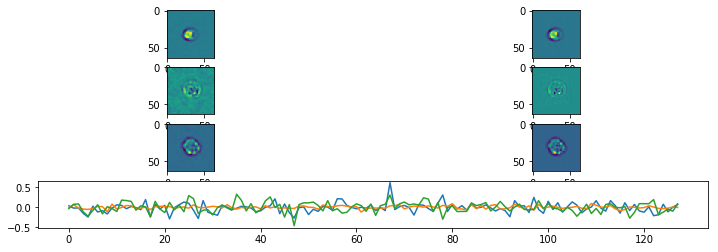

Epoch:  45 Iteration:  0 Loss:  2.151081 0.6897152 0.00024601817


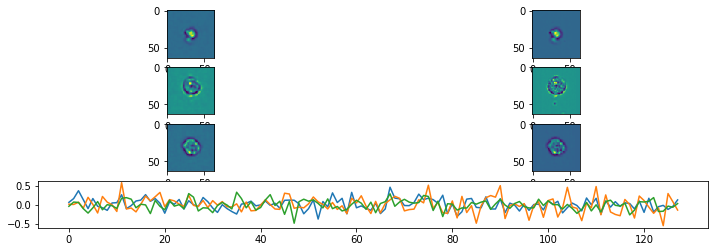

Epoch:  45 Iteration:  500 Loss:  1.9869802 0.68949115 0.00014904141


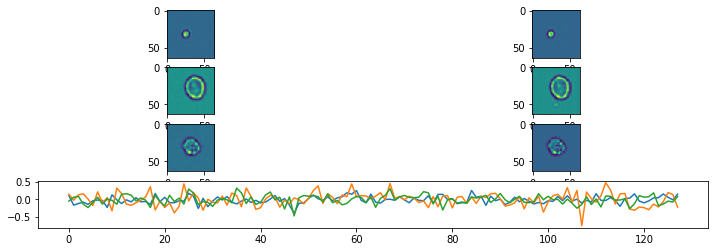

Epoch:  46 Iteration:  0 Loss:  2.1323497 0.6896965 0.00022506714


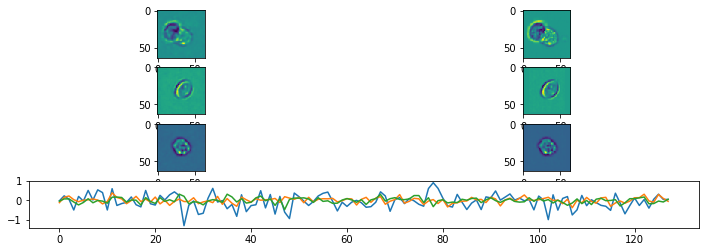

Epoch:  46 Iteration:  500 Loss:  1.9675479 0.68948233 0.000113487244


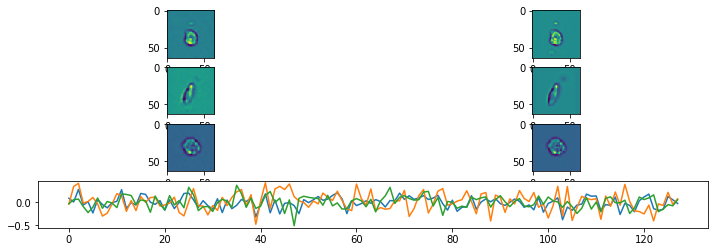

Epoch:  47 Iteration:  0 Loss:  2.0950358 0.689676 0.00013974309


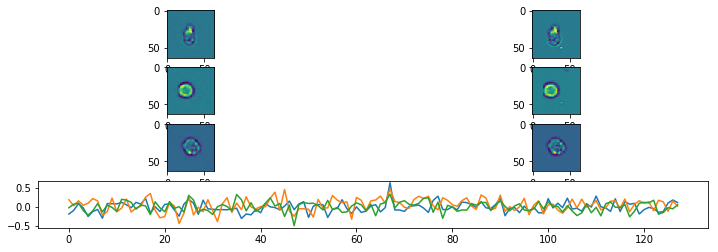

Epoch:  47 Iteration:  500 Loss:  1.9630529 0.6894826 0.00023567677


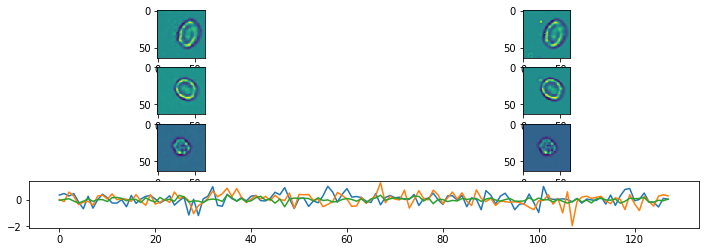

Epoch:  48 Iteration:  0 Loss:  2.0893726 0.68969 0.00027137995


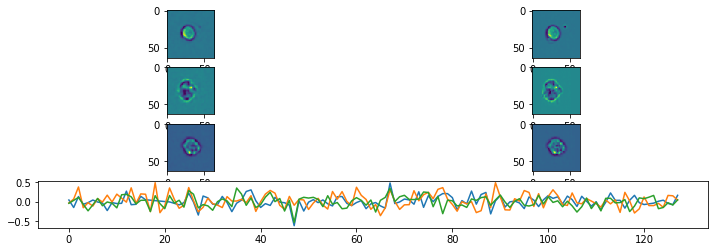

Epoch:  48 Iteration:  500 Loss:  1.9496417 0.68947923 0.00017482042


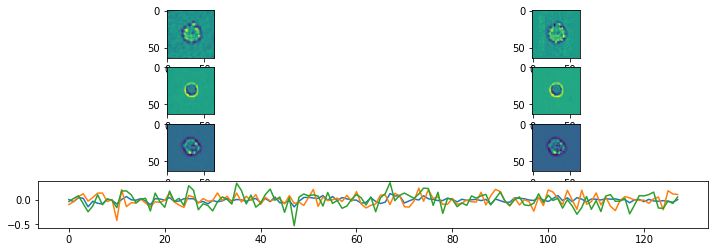

Epoch:  49 Iteration:  0 Loss:  2.0593293 0.68965733 0.00018391013


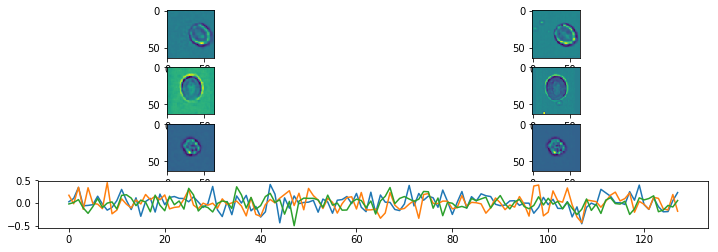

Epoch:  49 Iteration:  500 Loss:  1.9386997 0.6894692 0.000264287


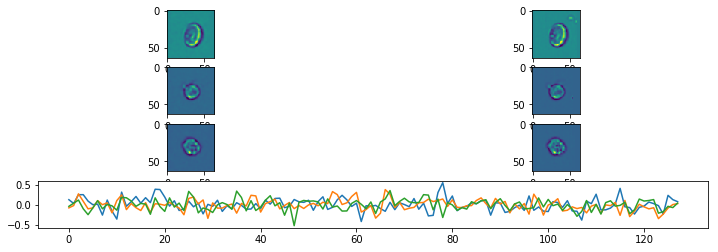

Epoch:  50 Iteration:  0 Loss:  2.0505357 0.6896578 0.00019687414


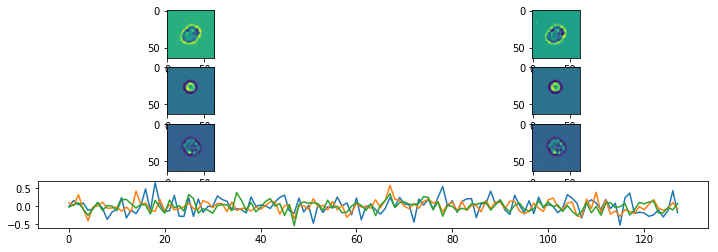

Epoch:  50 Iteration:  500 Loss:  1.9333092 0.68946475 0.0001347363


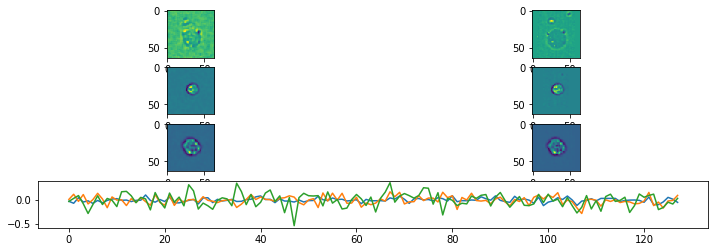

Epoch:  51 Iteration:  0 Loss:  2.0460186 0.68965304 0.0001924336


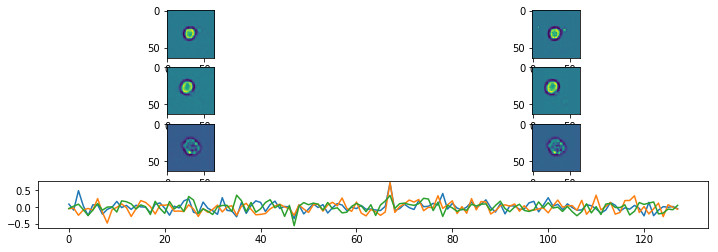

Epoch:  51 Iteration:  500 Loss:  1.9235485 0.68946147 0.00016918778


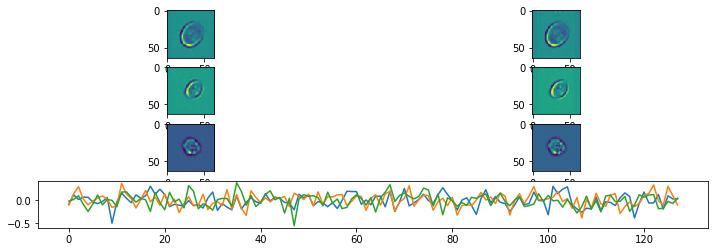

Epoch:  52 Iteration:  0 Loss:  2.048739 0.6896719 0.0002014041


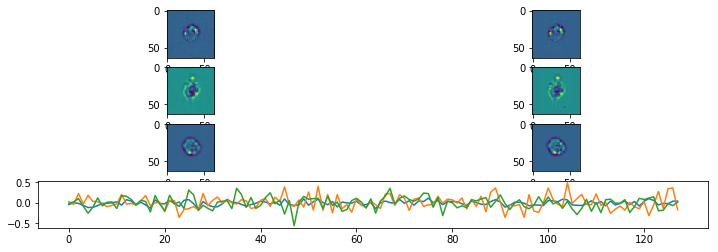

Epoch:  52 Iteration:  500 Loss:  1.9230294 0.68945456 0.00027942657


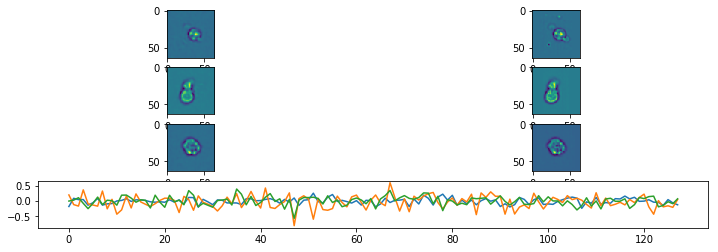

Epoch:  53 Iteration:  0 Loss:  2.040418 0.68964857 0.00016090274


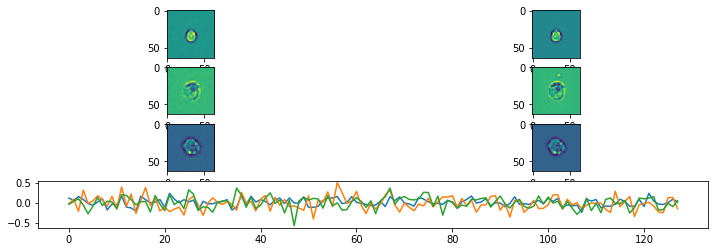

Epoch:  53 Iteration:  500 Loss:  1.9085501 0.6894522 0.00015461445


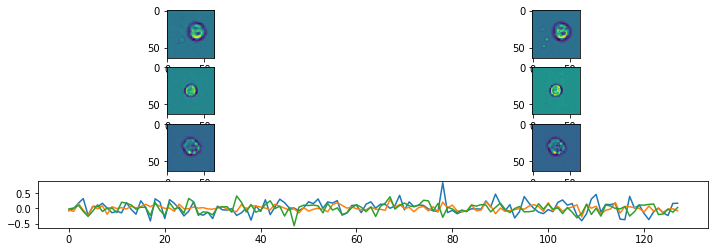

Epoch:  54 Iteration:  0 Loss:  2.0273252 0.6896583 0.00014981627


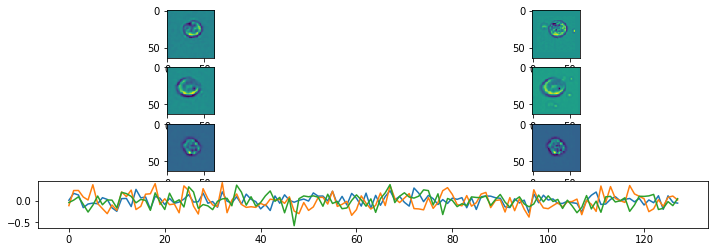

Epoch:  54 Iteration:  500 Loss:  1.9159939 0.6894614 0.00015938282


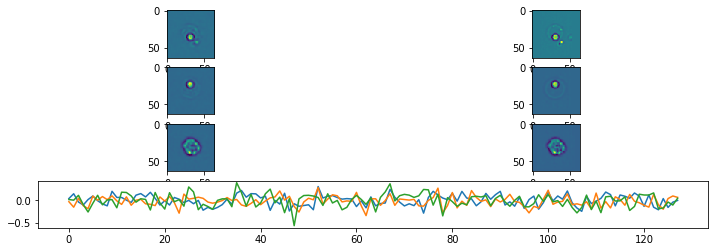

Epoch:  55 Iteration:  0 Loss:  2.0229802 0.6896329 1.0758638e-05


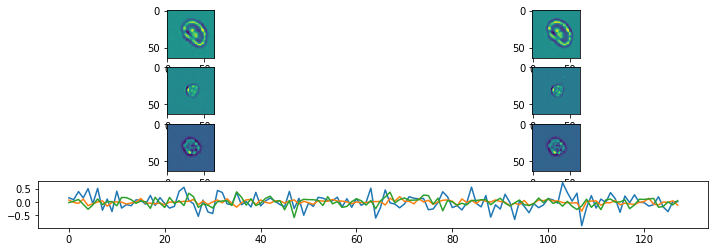

Epoch:  55 Iteration:  500 Loss:  1.9052427 0.6894537 3.9458275e-05


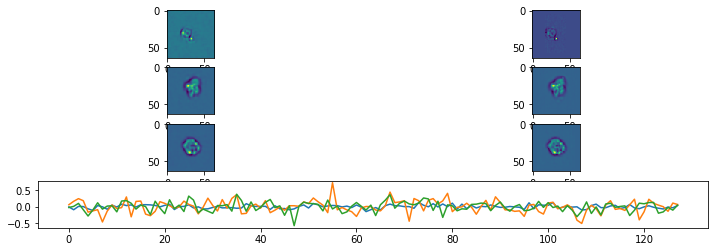

Epoch:  56 Iteration:  0 Loss:  2.0216556 0.68962467 0.00015512109


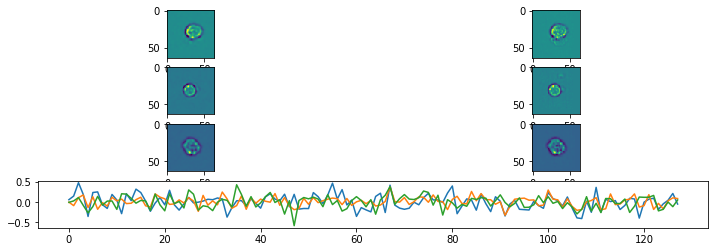

Epoch:  56 Iteration:  500 Loss:  1.9013438 0.6894455 5.1259995e-05


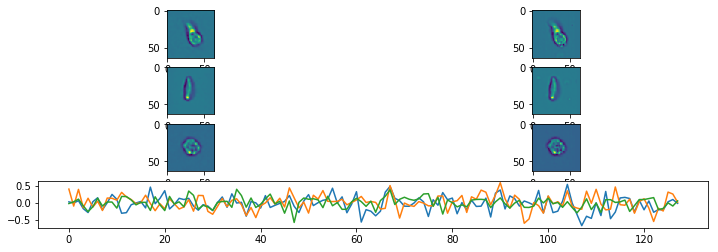

Epoch:  57 Iteration:  0 Loss:  2.015509 0.68963516 0.00018313527


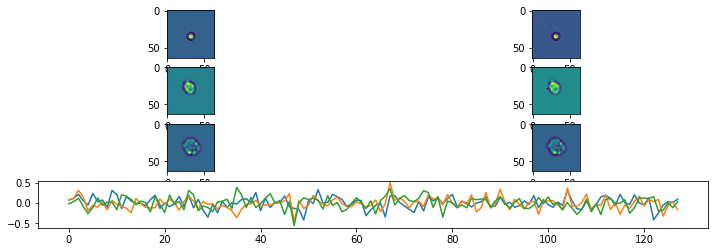

Epoch:  57 Iteration:  500 Loss:  1.9003892 0.6894469 0.0003427565


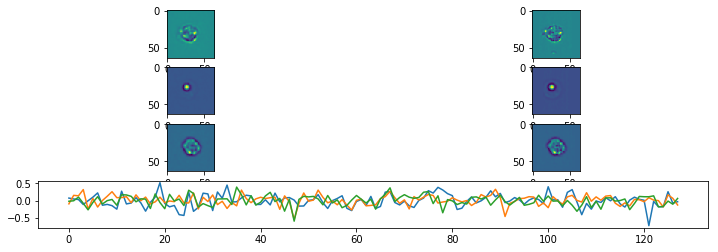

Epoch:  58 Iteration:  0 Loss:  2.004692 0.68962204 0.00053682923


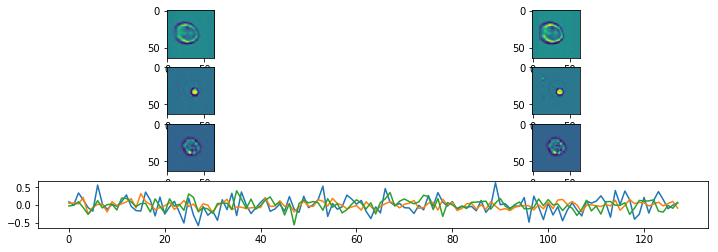

Epoch:  58 Iteration:  500 Loss:  1.8806977 0.6894459 3.8146973e-06


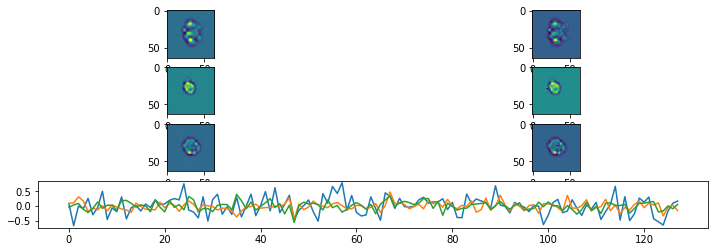

Epoch:  59 Iteration:  0 Loss:  1.996597 0.68963045 0.00018468499


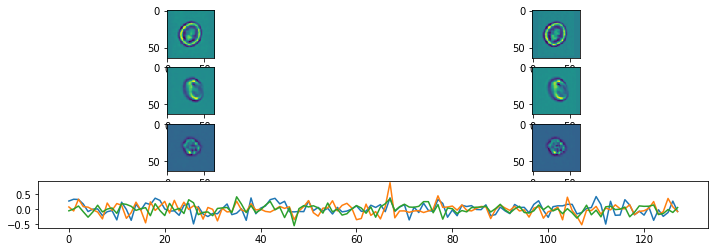

Epoch:  59 Iteration:  500 Loss:  1.8902082 0.68944436 0.00026363134


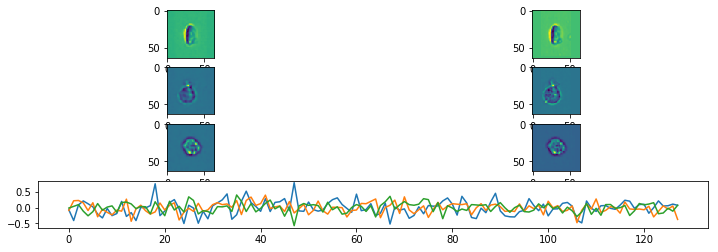

Done


In [4]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 64
p_height = 64
p_nchannels = 1
p_channels = [0]
p_nepochs = 60
p_batchsize = 128
p_learning_rate = 0.0002  #.00005
p_restore = False
p_latent_size = 128 #128 + 64
p_droprate = 0.95
p_stdev = .04

enc_sizes = [(64, 3), (128, 3), (256, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev

params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes

cpdir = "/v/Checkpoints/Cytometry/2018-04-16-Ch0-oldnorm-64"
if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 500, cpdir)

In [7]:
x = 4
x

4